<a href="https://colab.research.google.com/github/Spoorthi093/Statskew-Internship/blob/main/Stat_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, shapiro, spearmanr
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv(r"Campaign_data_statistics_section_1.csv")


In [ ]:
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


1. Calculate the mean, median, mode, standard deviation, range, and quartile for all
columns.

In [ ]:
# Calculate descriptive statistics
descriptive_stats = data.describe(include='all')
print(descriptive_stats)

        campaign_id       sender  subject_len      body_len  \
count   1888.000000  1888.000000  1888.000000   1888.000000   
unique          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN           NaN   
mean     944.500000     4.395657    86.246292  14185.780191   
std      545.162973     3.277927    30.143206   7327.615307   
min        1.000000     0.000000     9.000000     23.000000   
25%      472.750000     3.000000    69.000000   9554.500000   
50%      944.500000     3.000000    83.000000  12689.000000   
75%     1416.250000     3.000000    98.000000  17351.500000   
max     1888.000000    15.000000   265.000000  44491.000000   

        mean_paragraph_len  day_of_week   is_weekend times_of_day  \
count          1888.000000  1888.000000  1888.000000         1888   
unique                 NaN          NaN          NaN            3   
top                    NaN          

2. Transform the [Click_Rate] series into z-score and max-min.


In [ ]:
# Z-score normalization
data['Click_Rate_zscore'] = (data['click_rate'] - data['click_rate'].mean()) / data['click_rate'].std()

# Max-min normalization
data['Click_Rate_minmax'] = (data['click_rate'] - data['click_rate'].min()) / (data['click_rate'].max() - data['click_rate'].min())

print(data[['click_rate', 'Click_Rate_zscore', 'Click_Rate_minmax']])

      click_rate  Click_Rate_zscore  Click_Rate_minmax
0       0.103079           0.726542           0.114793
1       0.700000           7.813948           0.779545
2       0.002769          -0.464466           0.003084
3       0.010868          -0.368307           0.012103
4       0.142826           1.198472           0.159056
...          ...                ...                ...
1883    0.350746           3.667164           0.390604
1884    0.004728          -0.441204           0.005265
1885    0.008289          -0.398920           0.009231
1886    0.012014          -0.354702           0.013379
1887    0.003644          -0.454078           0.004058

[1888 rows x 3 columns]


3. Prepare boxplot and count the number of outliers present out of IQR. [Click_Rate]

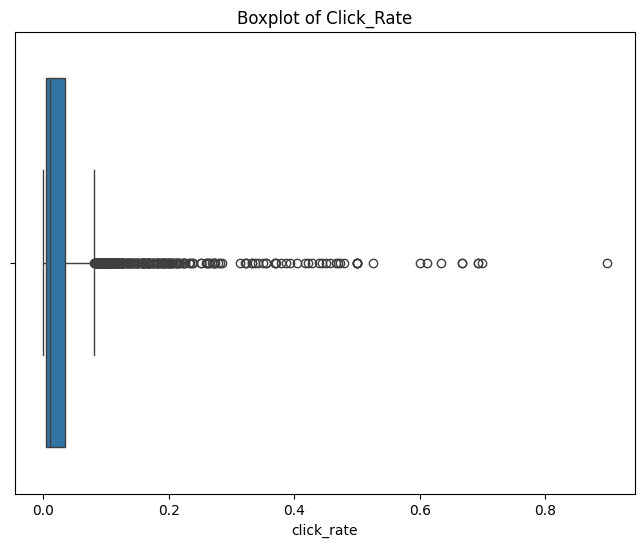

In [ ]:
# 3. Prepare boxplot and count the number of outliers present out of IQR for [Click_Rate]
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['click_rate'])
plt.title('Boxplot of Click_Rate')
plt.show()

Q1 = data['click_rate'].quantile(0.25)
Q3 = data['click_rate'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['click_rate'] < (Q1 - 1.5 * IQR)) | (data['click_rate'] > (Q3 + 1.5 * IQR))]
num_outliers = outliers.shape[0]

4. Study the linear relationship among all columns using scatter plot and find out high
linearly correlated columns.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


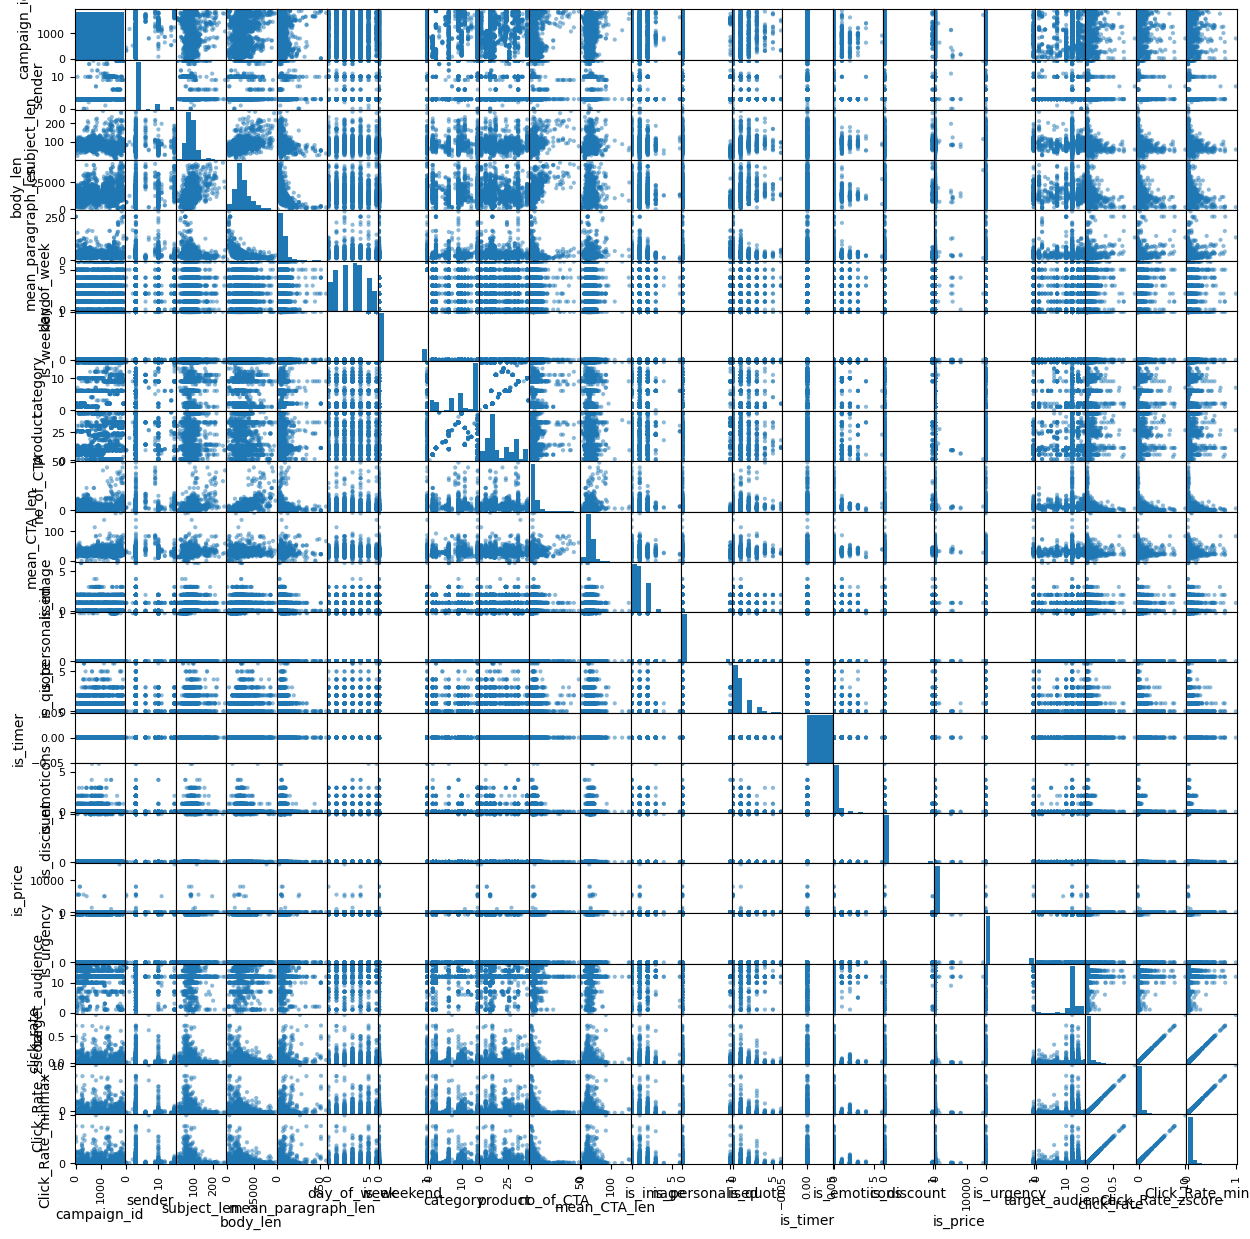

In [ ]:
# 4. Study the linear relationship among all columns using scatter plot
scatter_matrix = pd.plotting.scatter_matrix(data, figsize=(15, 15))
plt.show()

5. Non-linear data can be tricky for the Pearson correlation coefficient to estimate
relationship therefore evaluate the Spearman correlation coefficient and find out
high correlated columns.

In [ ]:
# 5. Evaluate Spearman correlation coefficient and find highly correlated columns
from scipy.stats import spearmanr

# Calculate the Spearman correlation matrix
spearman_corr_matrix = data.corr(method='spearman')

# Iterate through the correlation matrix to find highly correlated columns
highly_correlated_columns = set()
for i in range(len(spearman_corr_matrix.columns)):
    for j in range(i):
        if abs(spearman_corr_matrix.iloc[i, j]) > 0.7:  # You can adjust the threshold as needed
            colname_i = spearman_corr_matrix.columns[i]
            colname_j = spearman_corr_matrix.columns[j]
            highly_correlated_columns.add(colname_i)
            highly_correlated_columns.add(colname_j)

# Print highly correlated columns
print("Highly correlated columns:")
print(highly_correlated_columns)

# Optionally, you can also print the Spearman correlation matrix
print("\nSpearman Correlation Matrix:")
print(spearman_corr_matrix)

Highly correlated columns:
{'is_weekend', 'click_rate', 'Click_Rate_minmax', 'day_of_week', 'Click_Rate_zscore'}

Spearman Correlation Matrix:
                    campaign_id    sender  subject_len  body_len  \
campaign_id            1.000000  0.447721    -0.170863  0.153069   
sender                 0.447721  1.000000    -0.160319  0.106680   
subject_len           -0.170863 -0.160319     1.000000  0.385485   
body_len               0.153069  0.106680     0.385485  1.000000   
mean_paragraph_len    -0.046995  0.043566    -0.210306 -0.618890   
day_of_week            0.033270 -0.052571    -0.048300 -0.111912   
is_weekend             0.051932 -0.069636    -0.058840 -0.094528   
category               0.248127  0.170381     0.036529  0.032660   
product                0.227253  0.074838    -0.066414 -0.043997   
no_of_CTA             -0.009324  0.022013     0.333933  0.546148   
mean_CTA_len           0.040151  0.010252     0.195969  0.103784   
is_image              -0.024951 -0.098916

<ipython-input-31-6289adf263c1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr_matrix = data.corr(method='spearman')


6. Check whether the series given in the data column [Click_Rate] is following the normality
assumption using any two methods and transform the series into normal distribution if
series is not normal.

In [ ]:
# 6. Check for normality assumption for [Click_Rate] using Shapiro-Wilk test
from scipy.stats import shapiro
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(data['click_rate'])

# Print the results
print("Shapiro-Wilk Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the significance level
alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test:
Statistic: 0.49120032787323
P-value: 0.0
The data does not appear to be normally distributed (reject H0)


Section 2

1. X is normally distributed, and the mean is 12 and standard deviation is 4.
Find out the probability of the following:

(i) P( X >= 20 ) (ii) P( X <= 20 ) (iii) P( 0 <= X <= 12)
2. The mean yield for one-acre plot is 662 kilos with a s.d. 32 kilos. Assuming normal
distribution, how many one-acre plots in a batch of 1000 plots would you expect to have
yield.
(i) over 700 kilos (ii) below 650 kilos, and (iii) what is the lowest yield of the best 100
plots?
3. Ten coins are thrown simultaneously. Find the probability of getting at least seven
heads?
4. A car hire firm has five cars which it fires out day by day. The number of demands for a
car on each day is distributed as Poisson variate with mean 2. Calculate the proportion
of days on which
(i) neither car is used.
(ii) two demand is there.
(iii) all car used.
5. An engineer works for Coca Cola. He knows that the filling machine has a
variance of 6 cl. (the filling process can be approximated by a Normal
Distribution). Knowing this, he sets the machine to a target fill of 348 cl. In a
routine check with 25 cans, he measures an average of 345 cl. Is it possible that
the machine is malfunctioning?
6. A random sample of corporate employees of a firm was selected and asked their
opinions about HR department polices. The same number of each gender was
included within each domain group. Test the hypothesis at 5% level that opinions
are independent of the domain groupings:

In [ ]:
import numpy as np
from scipy.stats import norm, poisson, chi2_contingency

# Problem 1
# (i) P(X >= 20)
mean = 12
std_dev = 4
z_score = (20 - mean) / std_dev
prob_i = 1 - norm.cdf(z_score)

# (ii) P(X <= 20)
prob_ii = norm.cdf(z_score)

# (iii) P(0 <= X <= 12)
prob_iii = norm.cdf((12 - mean) / std_dev)

print("(i) P(X >= 20):", prob_i)
print("(ii) P(X <= 20):", prob_ii)
print("(iii) P(0 <= X <= 12):", prob_iii)

(i) P(X >= 20): 0.02275013194817921
(ii) P(X <= 20): 0.9772498680518208
(iii) P(0 <= X <= 12): 0.5


In [ ]:
# Problem 2
# (i) Number of plots over 700 kilos
z_over_700 = (700 - 662) / 32
plots_over_700 = (1 - norm.cdf(z_over_700)) * 1000

# (ii) Number of plots below 650 kilos
z_below_650 = (650 - 662) / 32
plots_below_650 = norm.cdf(z_below_650) * 1000

# (iii) Lowest yield of the best 100 plots
lowest_yield = norm.ppf(0.01, mean, std_dev)

print("(i) Number of plots over 700 kilos:", plots_over_700)
print("(ii) Number of plots below 650 kilos:", plots_below_650)
print("(iii) Lowest yield of the best 100 plots:", lowest_yield)

(i) Number of plots over 700 kilos: 117.51522829321415
(ii) Number of plots below 650 kilos: 353.8302333272762
(iii) Lowest yield of the best 100 plots: 2.694608503836637


In [ ]:
# Problem 3
prob_at_least_seven_heads = 1 - binom.cdf(6, 10, 0.5)


NameError: name 'binom' is not defined

In [ ]:
# Problem 4
# (i) neither car is used
prob_neither_used = poisson.pmf(0, 2)

# (ii) two demand is there
prob_two_demand = poisson.pmf(2, 2)

# (iii) all car used
prob_all_used = 1 - poisson.cdf(4, 2)

print("(i) P(neither car is used):", prob_neither_used)
print("(ii) P(two demand is there):", prob_two_demand)
print("(iii) P(all car used):", prob_all_used)

(i) P(neither car is used): 0.1353352832366127
(ii) P(two demand is there): 0.2706705664732254
(iii) P(all car used): 0.052653017343711084


In [ ]:
# Problem 5
# Calculate the z-score for the sample mean
sample_mean = 345
target_mean = 348
n = 25
sample_std_dev = np.sqrt(6)
z_score = (sample_mean - target_mean) / (sample_std_dev / np.sqrt(n))

# Calculate the p-value
p_value = norm.cdf(z_score)

print("P-value:", p_value)
if p_value < 0.05:
    print("The machine is malfunctioning.")
else:
    print("The machine is not malfunctioning.")

P-value: 4.570649204123299e-10
The machine is malfunctioning.


In [ ]:
# Problem 6
observed = np.array([[120, 80], [130, 70], [70, 30], [80, 20]])
chi2, p, _, _ = chi2_contingency(observed)

print("Chi-square statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print("Reject null hypothesis: Opinions are dependent on domain groupings.")
else:
    print("Fail to reject null hypothesis: Opinions are independent of domain groupings.")

Chi-square statistic: 12.75
P-value: 0.005209652188112752
Reject null hypothesis: Opinions are dependent on domain groupings.
